In [1]:
# Importing all requires libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg
import random
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay

In [2]:
# Given data is grouped in two different parts

#1.train_data
train_data_path = '../data/Train'

#2.test_data
test_data_path = '../data/Test'

In [3]:
def visualize_images(data_path, num_images_per_class=5):
    class_names = os.listdir(data_path)  
    plt.figure(figsize=(12, 6))  
    idx = 1  

    for class_name in class_names:
        class_folder = os.path.join(data_path, class_name)
        img_names = os.listdir(class_folder)[:num_images_per_class] 
        for img_name in img_names:
            img_path = os.path.join(class_folder, img_name)
            img = mpimg.imread(img_path)
            plt.subplot(2, num_images_per_class, idx)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
            idx += 1
    
    plt.suptitle('Image: Caries and Gingivitis', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  
    plt.show()

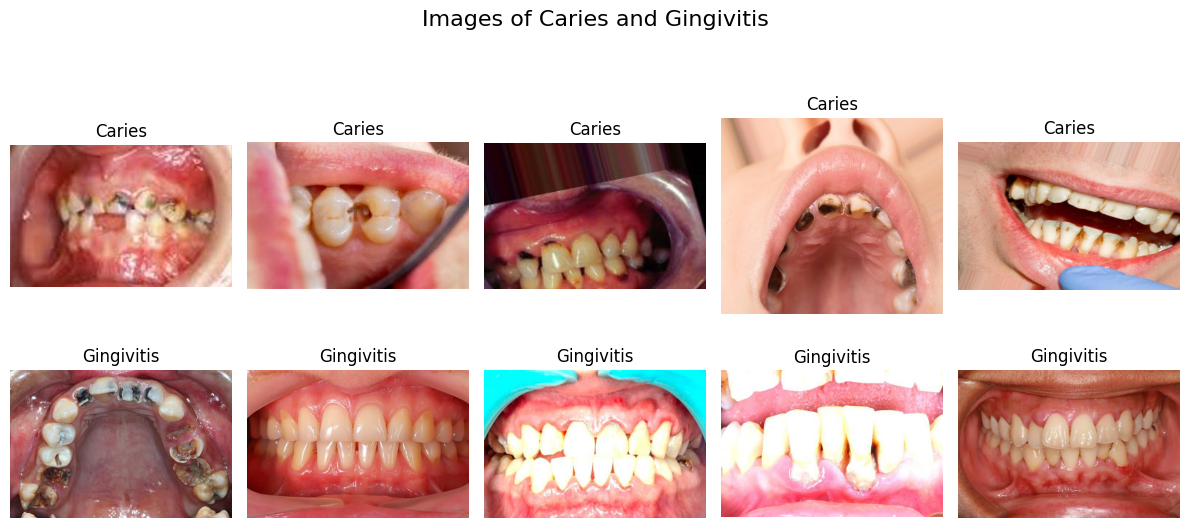

In [4]:
show_images(test_data_path)

In [5]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)

Found 1486 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [6]:
# model building
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [7]:
# Binary classification

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# model training
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

C:\Users\isatyamks\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 44s 785ms/step - accuracy: 0.6956 - loss: 0.8092 - val_accuracy: 0.9118 - val_loss: 0.2183
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 827ms/step - accuracy: 0.8967 - loss: 0.2429 - val_accuracy: 0.9363 - val_loss: 0.1537
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 768ms/step - accuracy: 0.9422 - loss: 0.1679 - val_accuracy: 0.9289 - val_loss: 0.1529
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 815ms/step - accuracy: 0.9230 - loss: 0.2174 - val_accuracy: 0.9338 - val_loss: 0.1424
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 744ms/step - accuracy: 0.9519 - loss: 0.1505 - val_accuracy: 0.8946 - val_loss: 0.2015
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 746ms/step - accuracy: 0.9505 - loss: 0.1404 - val_accuracy: 0.9265 - val_loss: 0.1488
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 742ms/step - accuracy: 0.9608 - loss: 0.1256 - val_accuracy: 0.9363 - val_loss: 0.1644
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 773ms/step - accuracy: 0.9644 - loss: 0.1222 - val_accu

In [27]:
model.save('caries_gingivitis_model.keras')

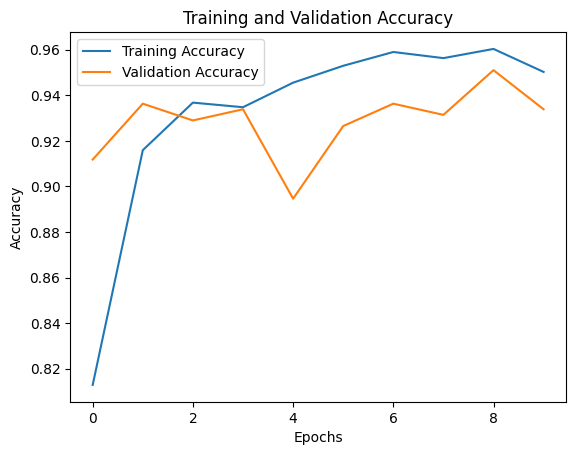

In [11]:
# Accuracy Graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

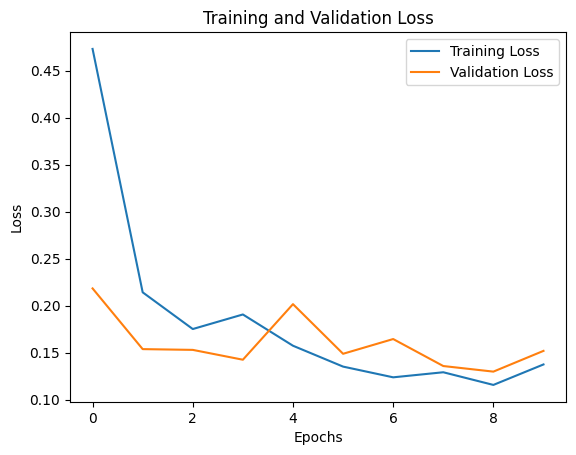

In [12]:
# Loss Graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 426ms/step - accuracy: 0.9217 - loss: 0.1813
Test Accuracy: 0.93
